In [1]:
# Импортируем нужные либы

import numpy as np
import scipy.stats as sts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Настроим красивое отображение графиков

sns.set(
    font_scale=1,
    style='whitegrid',
    rc={'figure.figsize':(10,8)}
)

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).   
* Сгенерируйте из него выборку объёма 1000  
* Постройте гистограмму выборки  
* Нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True)


<div class='alert alert-info'> <b>В новыйх версиях параметр normed был заменён на density. Используем его.</b></div>

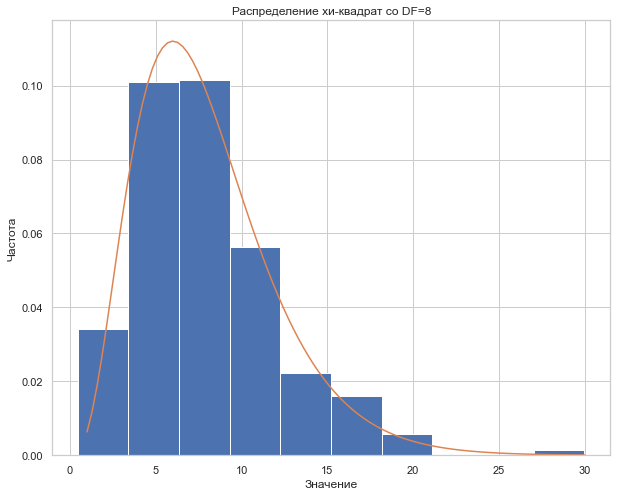

In [100]:
# Выберем распределение хи-квадрат со количеством степеней свооды равном 8
k = 8
rv = sts.chi2(k)

# сгенерируем выборку объемом 1000
sample = rv.rvs(1000)

# Построим гистограмму
ax = pd.Series(sample).hist(density=True)

# Посмотрим на теоретическое распределение
x = np.linspace(1, 30, 100)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Распределение хи-квадрат со DF=8');

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок.   
  
Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.   
  
Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.   
*Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки.*  
  
Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).



<b>Зададим функцию поиска параметров нормального распределения средних</b>

In [93]:
def norm_ras(x):
    mean = rv.mean() 
    std = rv.std() 
    sigma = std / np.sqrt(x)
    return sts.norm(mean, sigma)

#### Нарисуем графики распределния средних с их гистограммами

Text(0.5, 1.0, 'Распределение средних хи-квадрат и нормальное рапспределение средних при n=3')

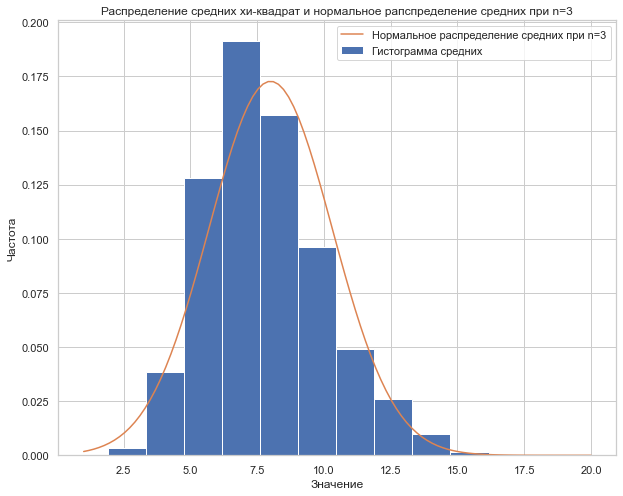

In [103]:
# Для n=3
n = 3
means = []
for i in range(1000):
    samp = rv.rvs(n)
    mean = samp.mean()
    means.append(mean)
pd.Series(means).hist(density=True);

# Теоретическая плотность распределения для n=3
x = np.linspace(1, 20, 100)
pdf = norm_ras(n).pdf(x)
plt.plot(x, pdf);


plt.legend(['Нормальное распределение средних при n=3', 'Гистограмма средних'])
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Распределение средних хи-квадрат и нормальное рапспределение средних при n=3')

Text(0.5, 1.0, 'Распределение средних хи-квадрат и нормальное рапспределение средних при n=10')

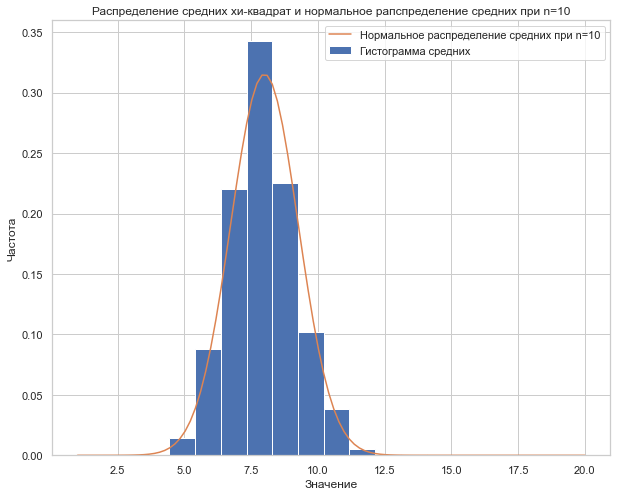

In [104]:
# Для n = 10:
n = 10
means = []
for i in range(1000):
    samp = rv.rvs(n)
    mean = samp.mean()
    means.append(mean)
pd.Series(means).hist(density=True);

# Теоретическая плотность распределения для n=3
x = np.linspace(1, 20, 100)
pdf = norm_ras(n).pdf(x)
plt.plot(x, pdf);

plt.legend(['Нормальное распределение средних при n=10', 'Гистограмма средних'])
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Распределение средних хи-квадрат и нормальное рапспределение средних при n=10')

Text(0.5, 1.0, 'Распределение средних хи-квадрат и нормальное рапспределение средних при n=50')

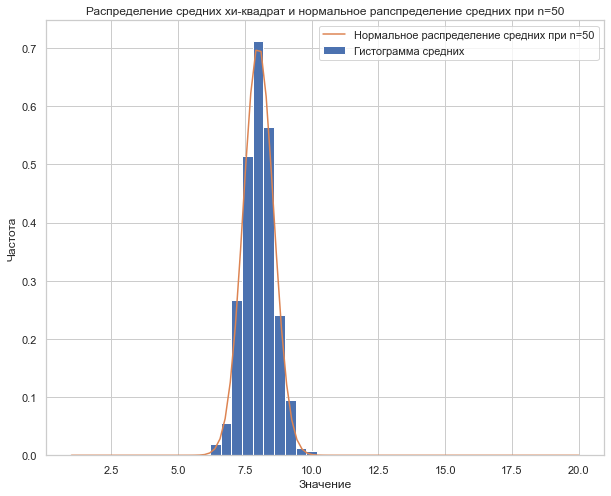

In [105]:
# Для n = 50:
n = 50
means = []
for i in range(1000):
    samp = rv.rvs(n)
    mean = samp.mean()
    means.append(mean)
pd.Series(means).hist(density=True);

# Теоретическая плотность распределения для n=3
x = np.linspace(1, 20, 100)
pdf = norm_ras(n).pdf(x)
plt.plot(x, pdf);

plt.legend(['Нормальное распределение средних при n=50', 'Гистограмма средних'])
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Распределение средних хи-квадрат и нормальное рапспределение средних при n=50')

### Вывод:   
* чем большие выборки мы используем, тем ближе выборочные средние к нормальному распределению средних;  
* при n = 50 апроксимакция нормальным распределением выполняется лучше, чем при n=10 и при n=3